<a href="https://colab.research.google.com/github/itsananyaa/Internship_Assigments/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import zipfile
import os

# Define the path to the uploaded file and the extraction directory
zip_path = '/content/archive.zip'
extract_dir = '/content/archive/extracted_files/'

# Create the extraction directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Extract the contents of the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List the extracted files
extracted_files = os.listdir(extract_dir)
extracted_files


['WA_Fn-UseC_-Telco-Customer-Churn.csv']

In [3]:
import pandas as pd

# Load the CSV file into a DataFrame
csv_path = os.path.join(extract_dir, 'WA_Fn-UseC_-Telco-Customer-Churn.csv')
data = pd.read_csv(csv_path)

# Display basic information about the DataFrame
data_info = data.info()
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


(None,
    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
 0  7590-VHVEG  Female              0     Yes         No       1           No   
 1  5575-GNVDE    Male              0      No         No      34          Yes   
 2  3668-QPYBK    Male              0      No         No       2          Yes   
 3  7795-CFOCW    Male              0      No         No      45           No   
 4  9237-HQITU  Female              0      No         No       2          Yes   
 
       MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
 0  No phone service             DSL             No  ...               No   
 1                No             DSL            Yes  ...              Yes   
 2                No             DSL            Yes  ...               No   
 3  No phone service             DSL            Yes  ...              Yes   
 4                No     Fiber optic             No  ...               No   
 
   TechSupport StreamingTV StreamingMovie

In [4]:
# Check for missing values
missing_values = data.isnull().sum()

# Convert 'TotalCharges' to numeric, coercing errors to NaN
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Check for missing values again after conversion
missing_values_after_conversion = data.isnull().sum()

missing_values, missing_values_after_conversion


(customerID          0
 gender              0
 SeniorCitizen       0
 Partner             0
 Dependents          0
 tenure              0
 PhoneService        0
 MultipleLines       0
 InternetService     0
 OnlineSecurity      0
 OnlineBackup        0
 DeviceProtection    0
 TechSupport         0
 StreamingTV         0
 StreamingMovies     0
 Contract            0
 PaperlessBilling    0
 PaymentMethod       0
 MonthlyCharges      0
 TotalCharges        0
 Churn               0
 dtype: int64,
 customerID           0
 gender               0
 SeniorCitizen        0
 Partner              0
 Dependents           0
 tenure               0
 PhoneService         0
 MultipleLines        0
 InternetService      0
 OnlineSecurity       0
 OnlineBackup         0
 DeviceProtection     0
 TechSupport          0
 StreamingTV          0
 StreamingMovies      0
 Contract             0
 PaperlessBilling     0
 PaymentMethod        0
 MonthlyCharges       0
 TotalCharges        11
 Churn                

In [5]:
# Remove rows with missing 'TotalCharges' values
data_cleaned = data.dropna(subset=['TotalCharges'])

# Verify that there are no missing values
missing_values_cleaned = data_cleaned.isnull().sum()

missing_values_cleaned


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [7]:
# Summary statistics
print(data_cleaned.describe())

# Distribution of categorical features
categorical_features = data_cleaned.select_dtypes(include=['object']).columns
for col in categorical_features:
    print(data_cleaned[col].value_counts())

       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000
customerID
7590-VHVEG    1
0265-PSUAE    1
2956-GGUCQ    1
6008-NAIXK    1
5956-YHHRX    1
             ..
7874-ECPQJ    1
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
3186-AJIEK    1
Name: count, Length: 7032, dtype: int64
gender
Male      3549
Female    3483
Name: count, dtype: int64
Partner
No     3639
Yes    3393
Name: count, dtype: int64
Dependents
No     4933
Yes    2099
Name: count, dtype: int64
PhoneService
Ye

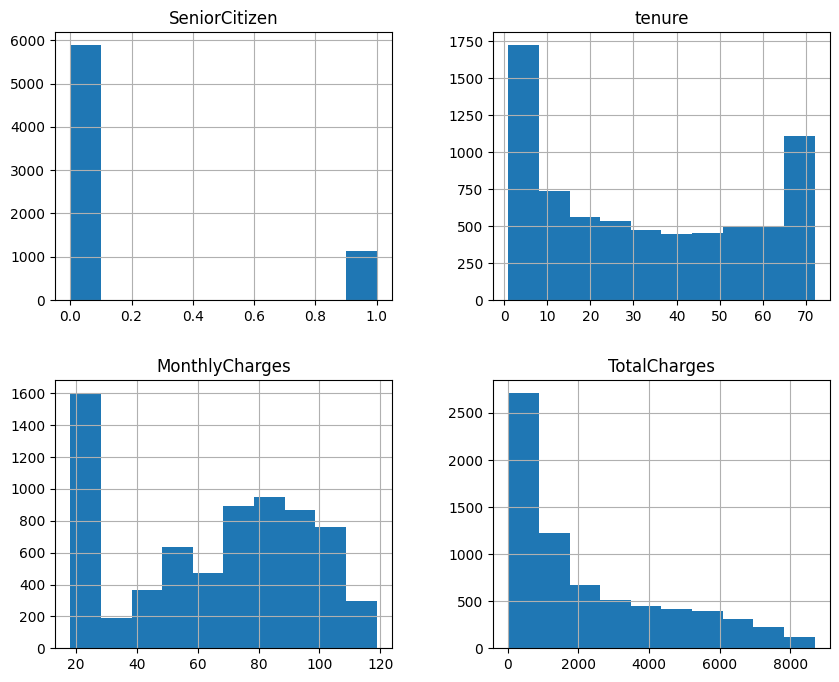

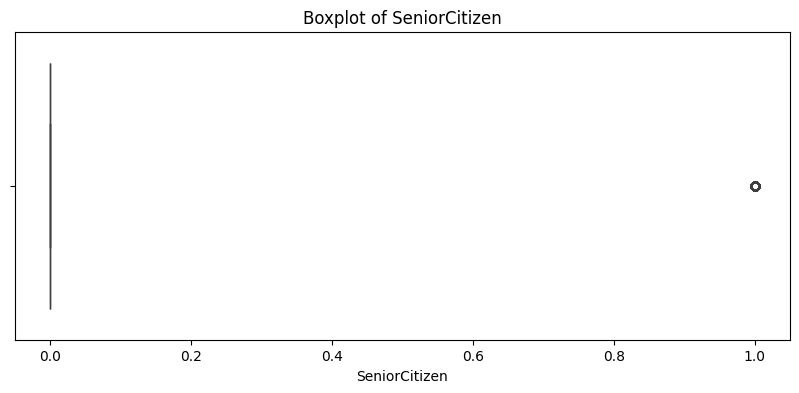

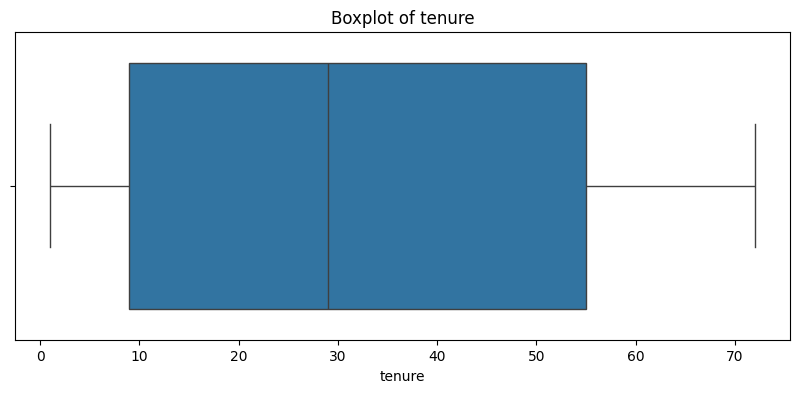

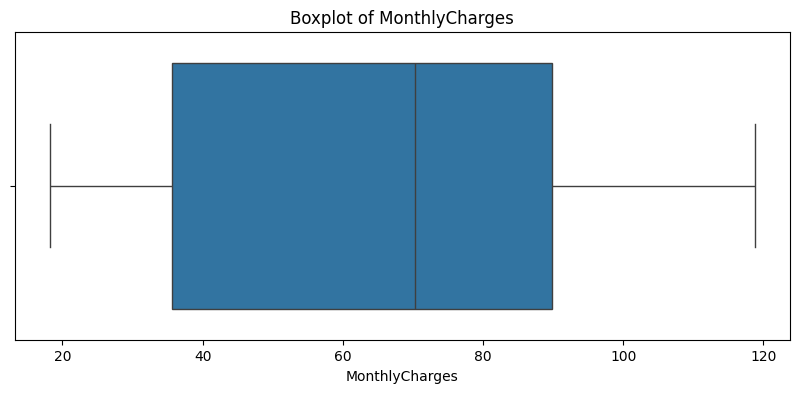

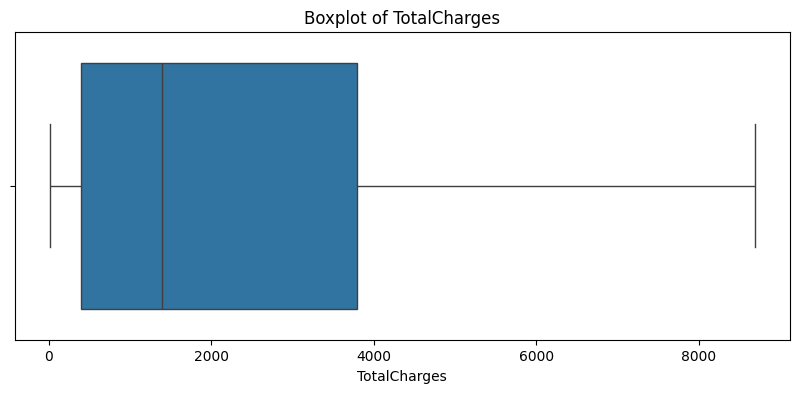

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
# Histograms
numeric_features = data_cleaned.select_dtypes(include=['int64', 'float64']).columns
data_cleaned[numeric_features].hist(figsize=(10, 8))
plt.show()

# Boxplots
for col in numeric_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=data_cleaned[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

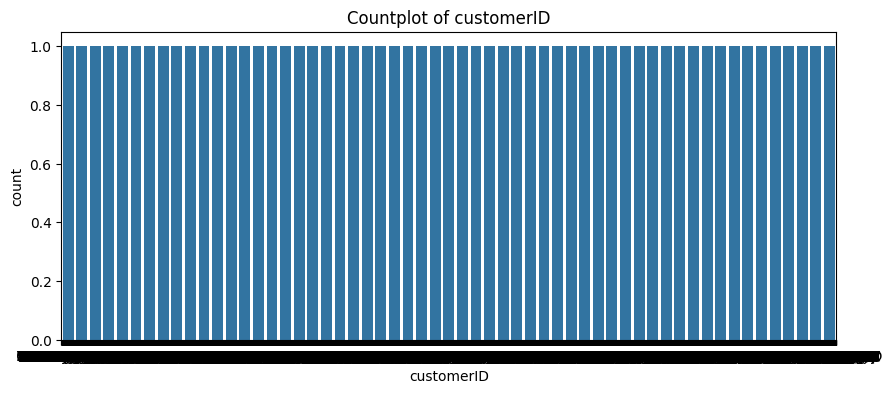

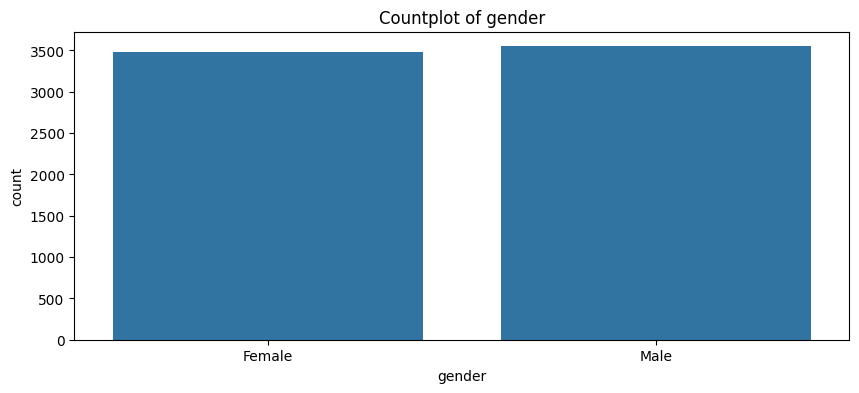

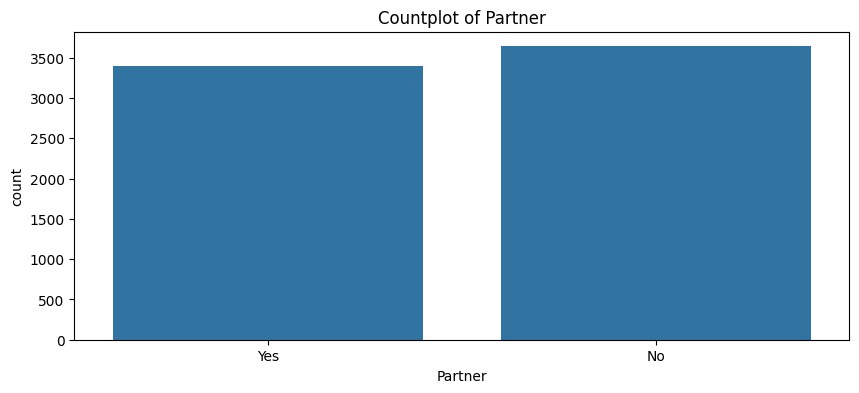

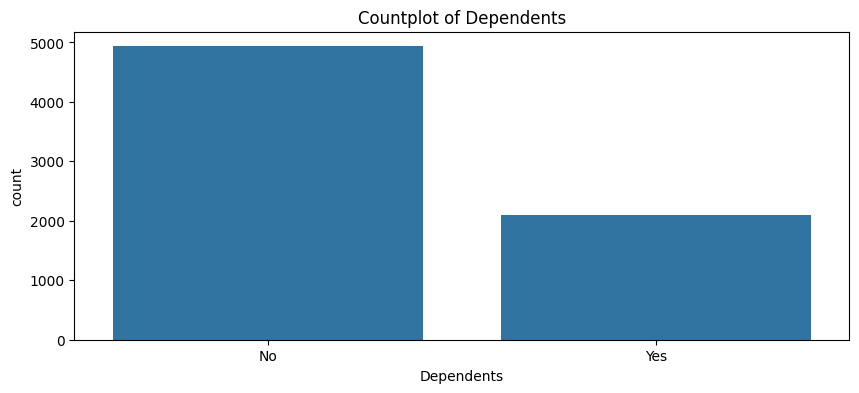

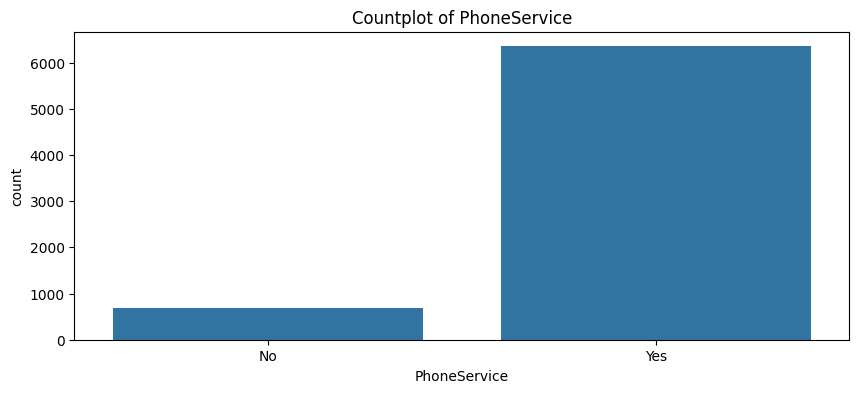

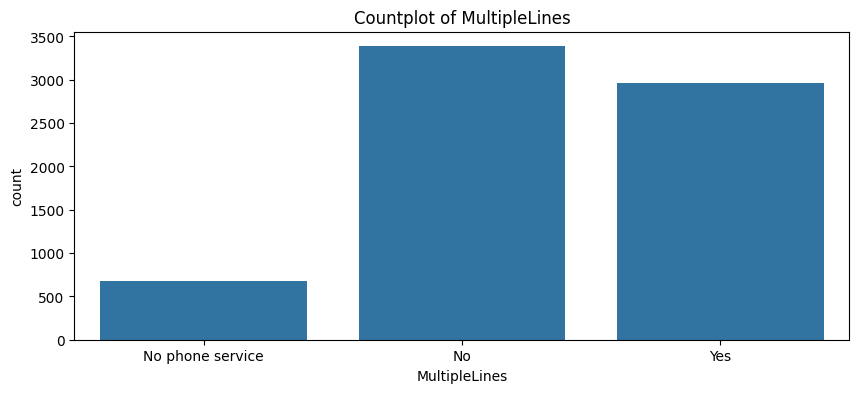

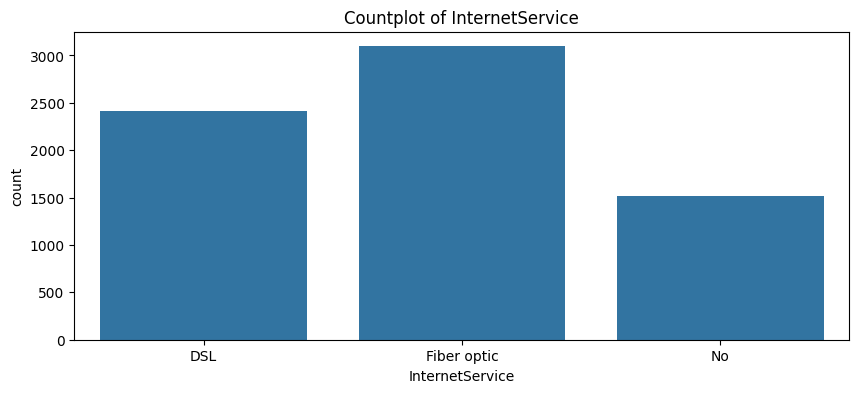

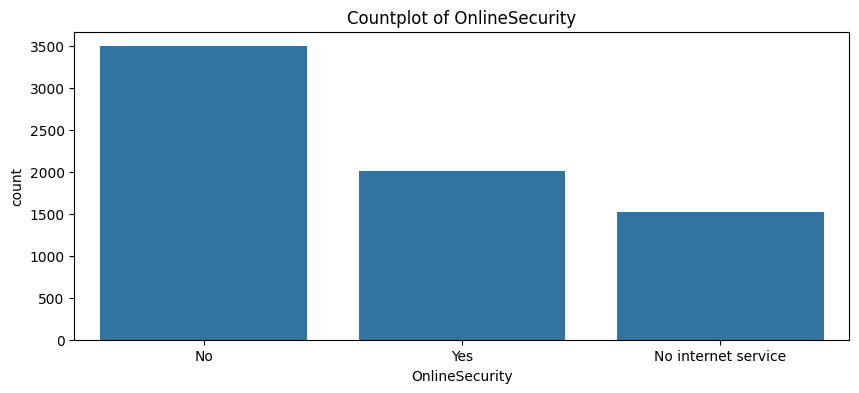

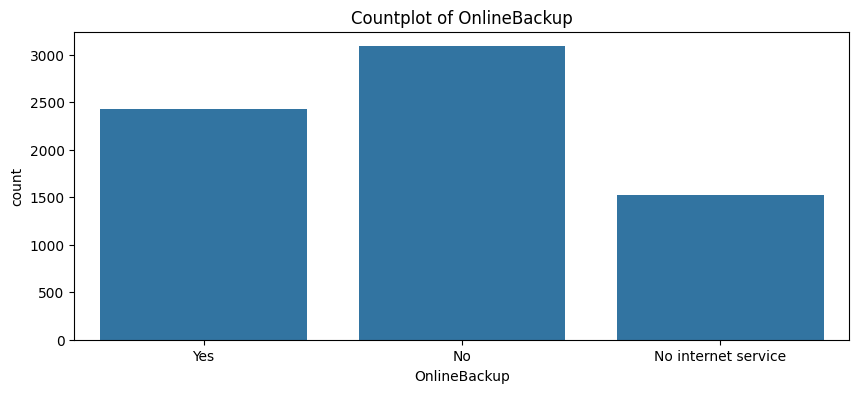

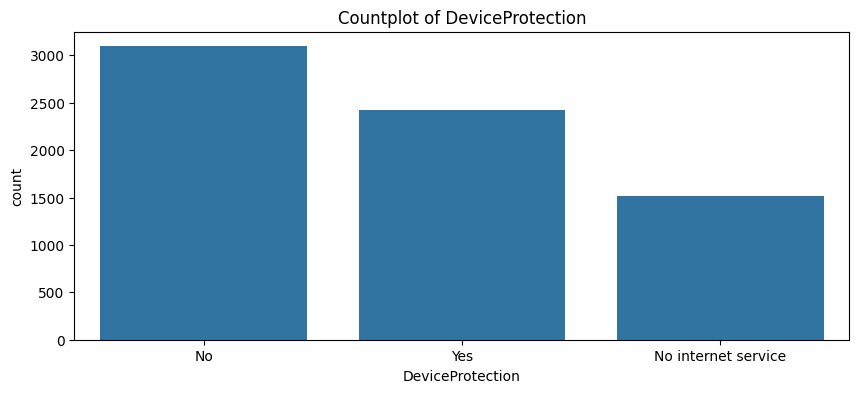

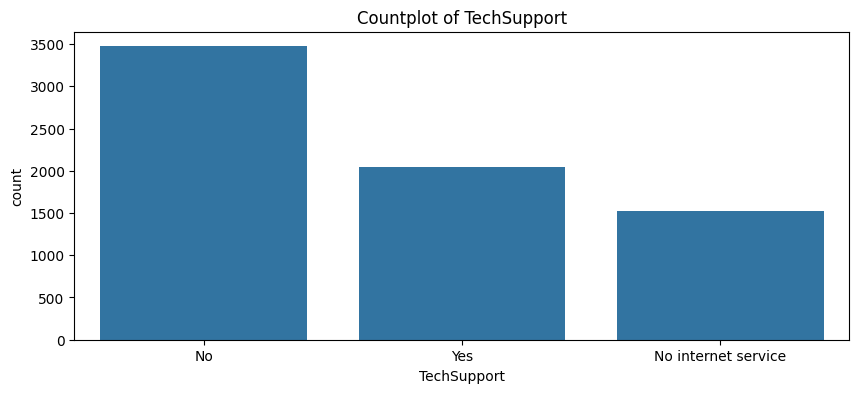

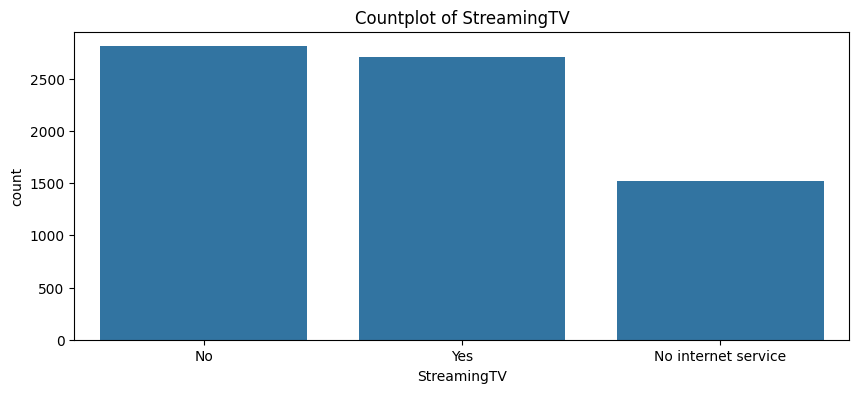

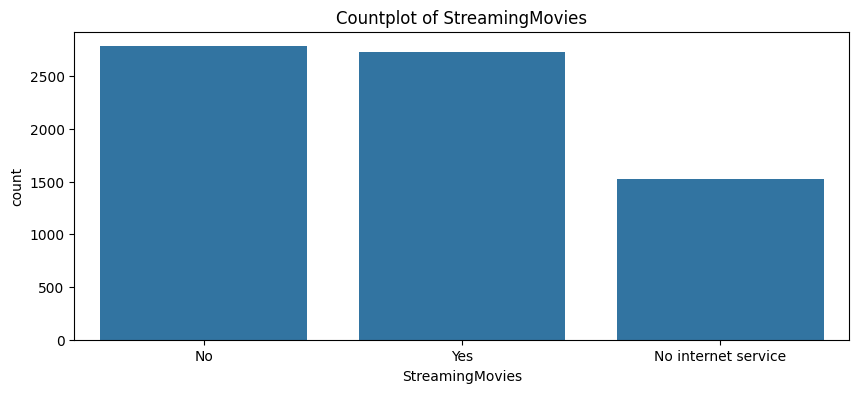

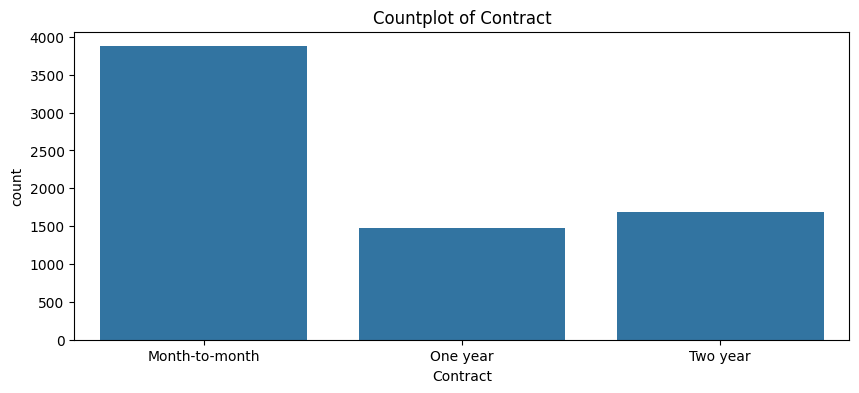

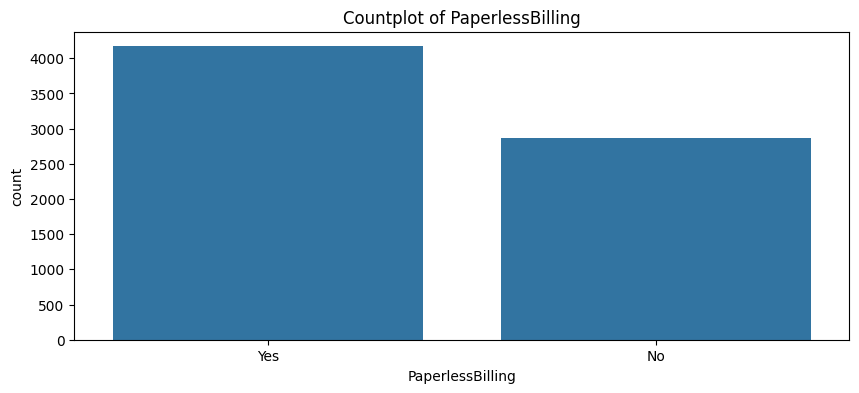

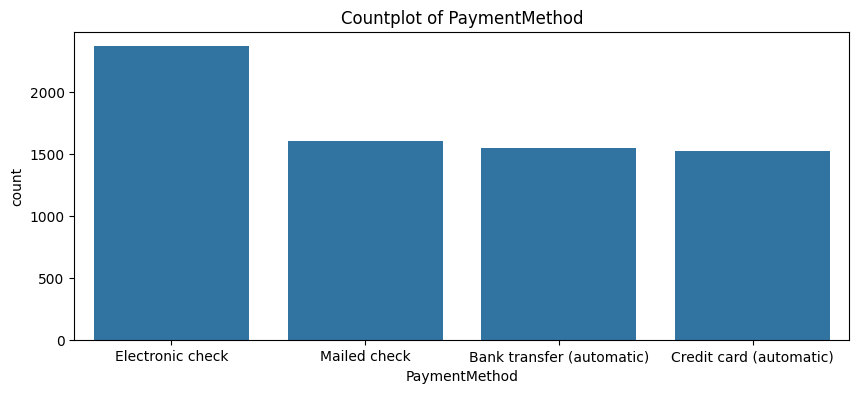

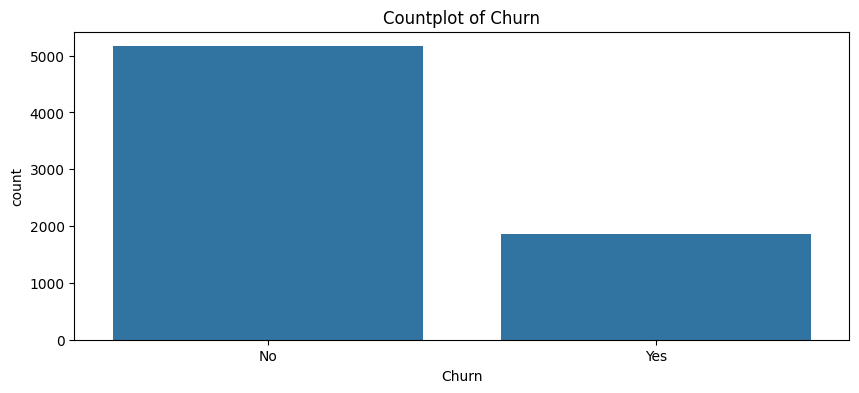

In [11]:
# Countplots
for col in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=data_cleaned[col])
    plt.title(f'Countplot of {col}')
    plt.show()

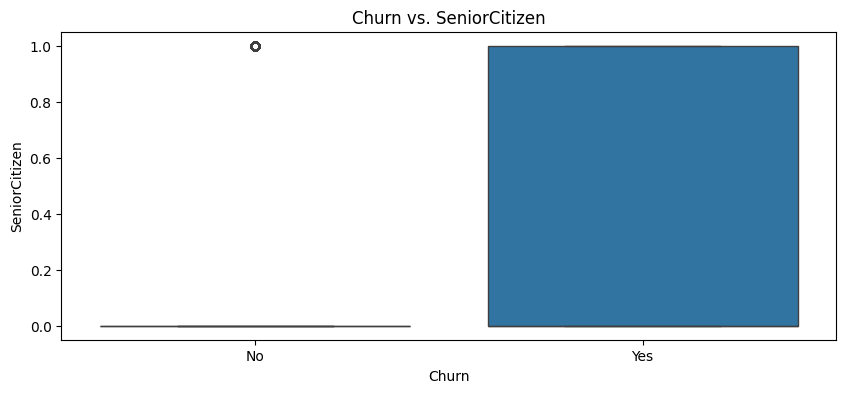

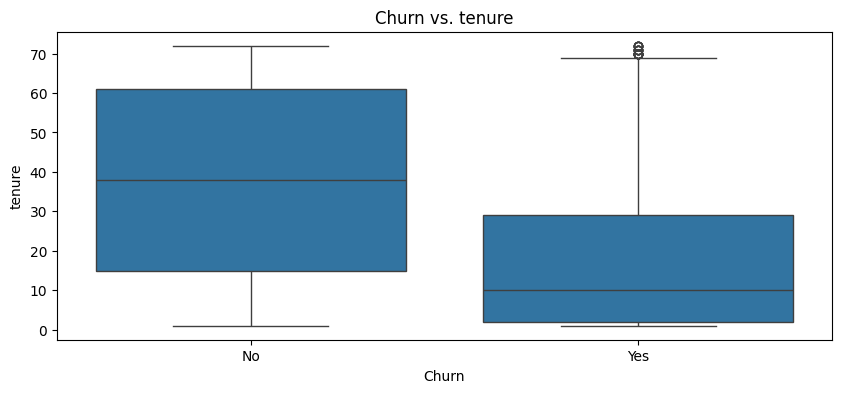

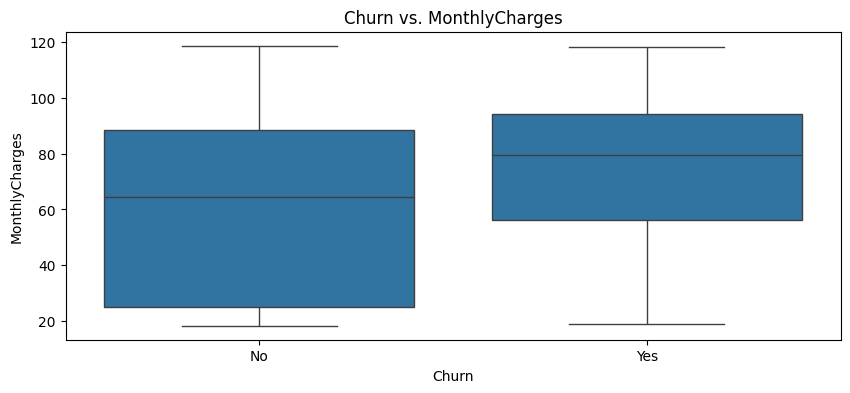

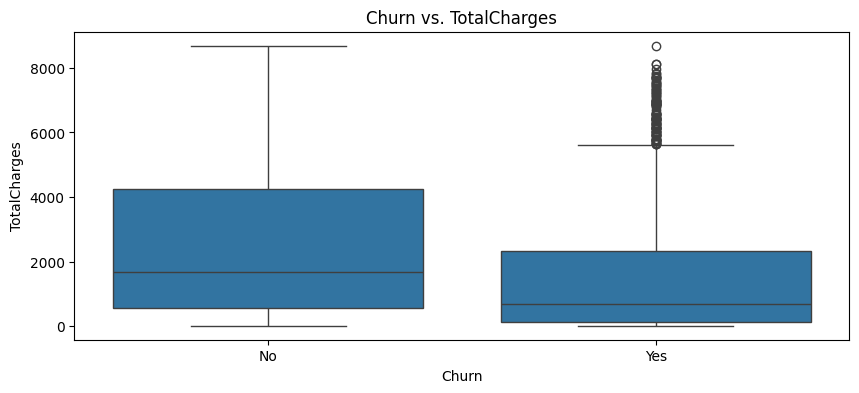

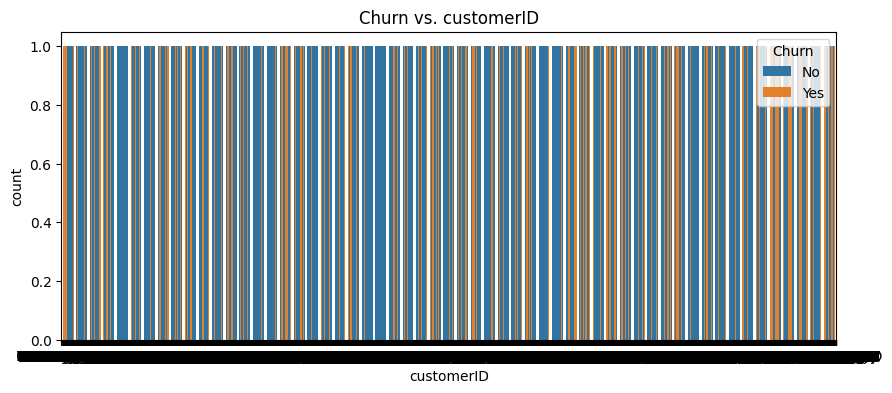

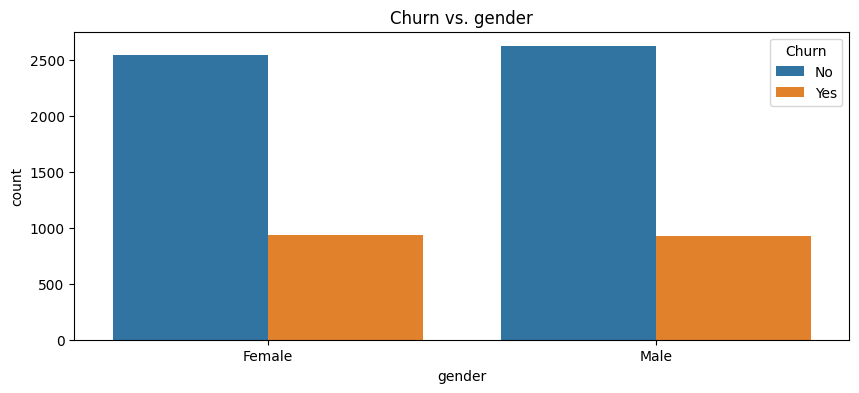

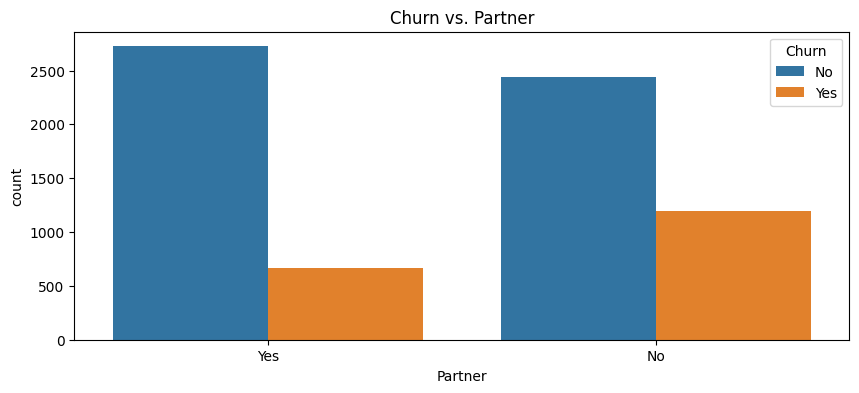

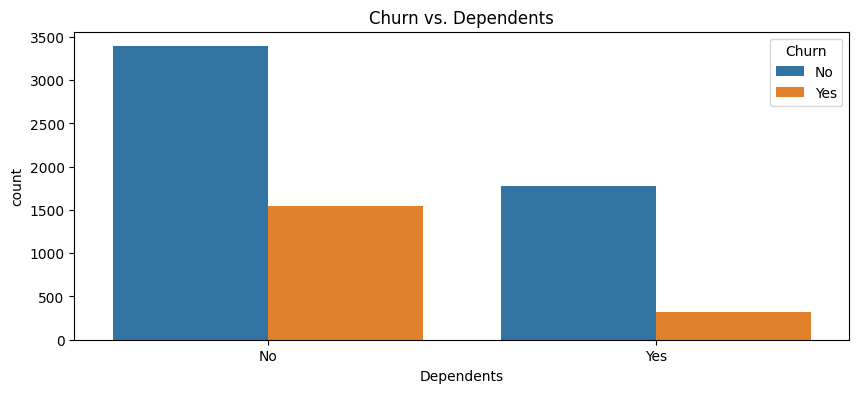

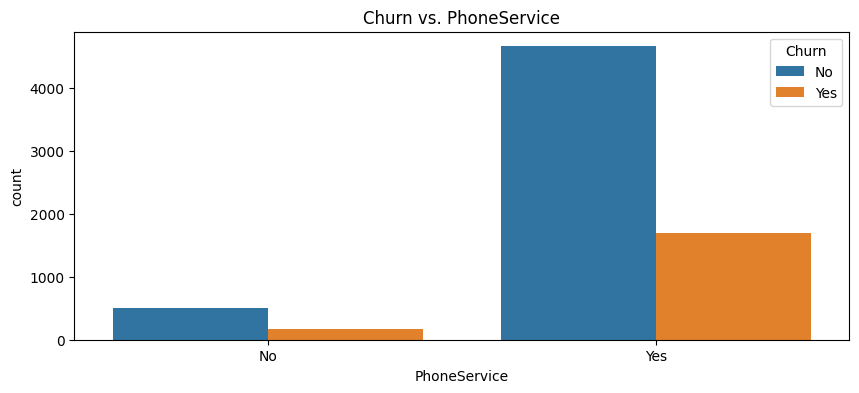

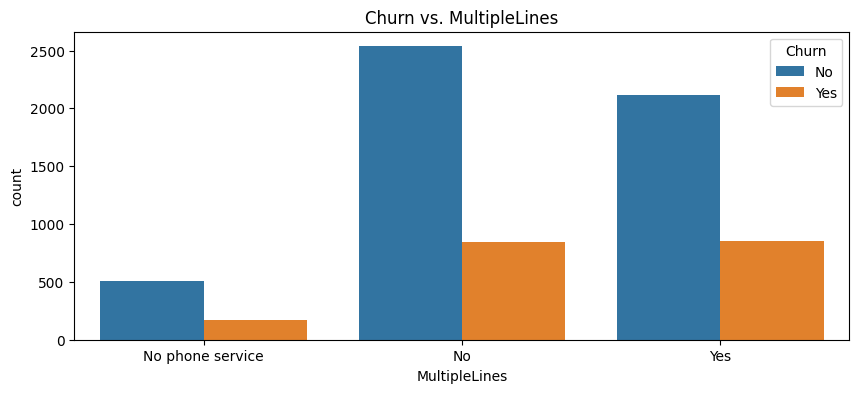

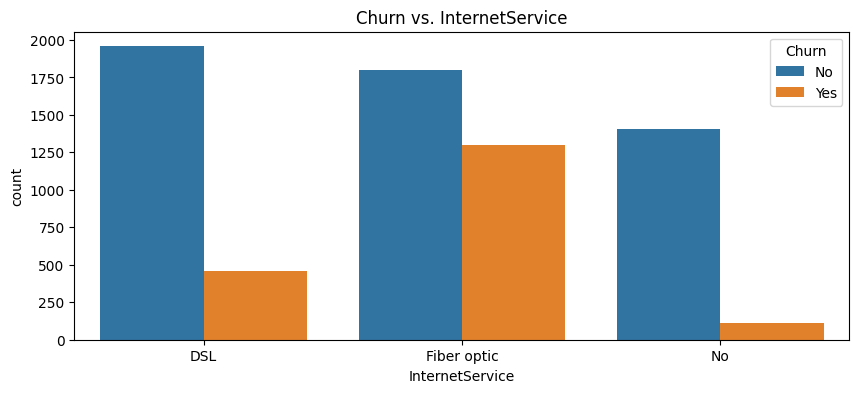

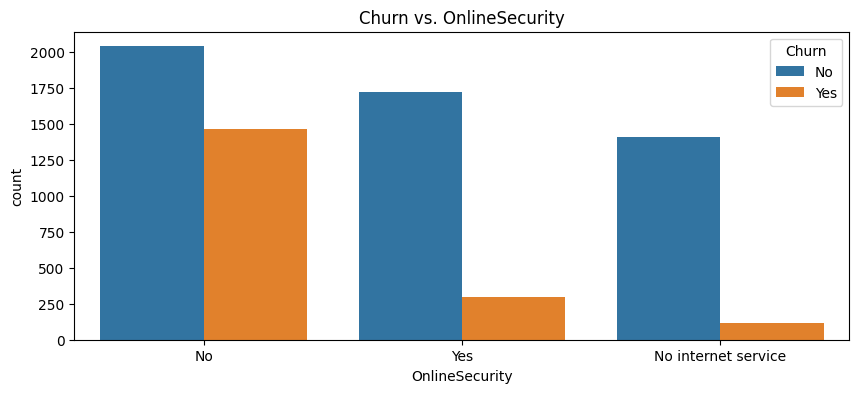

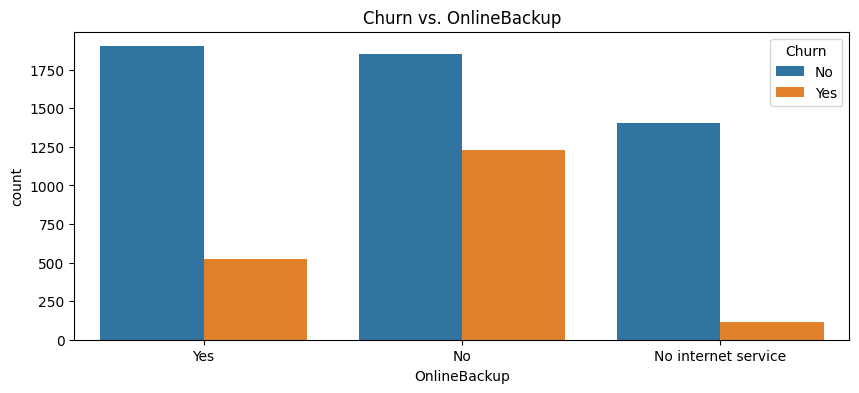

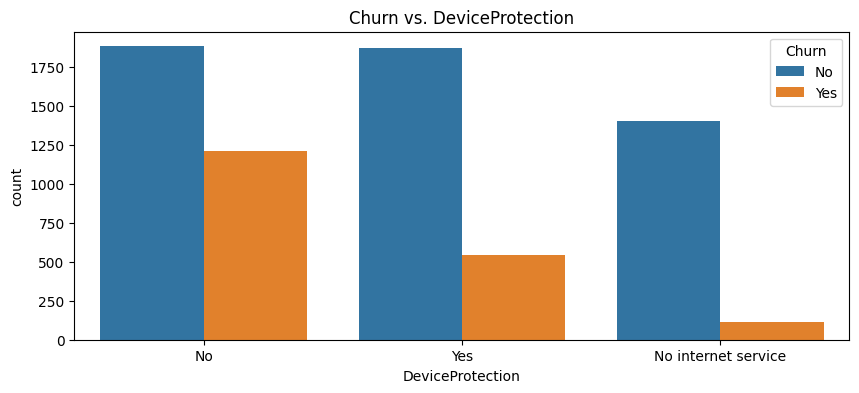

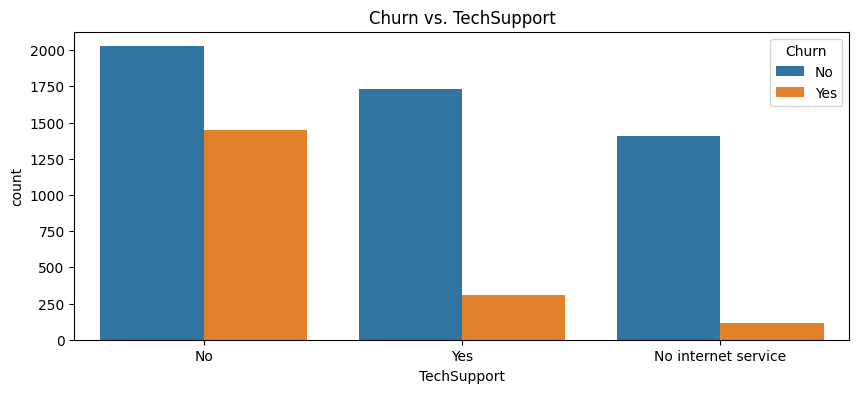

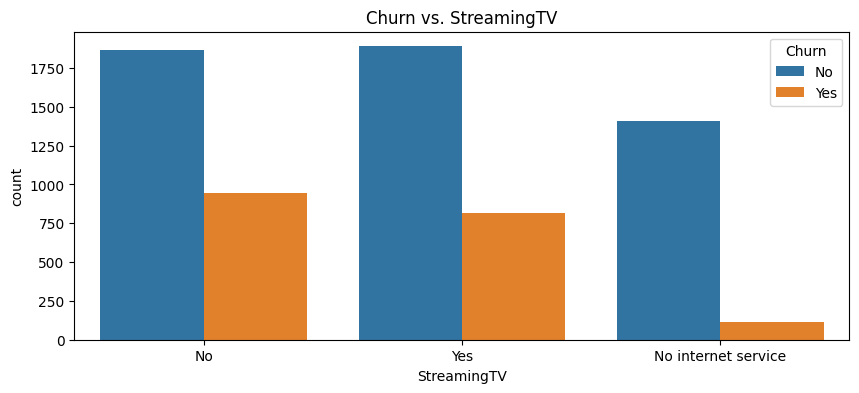

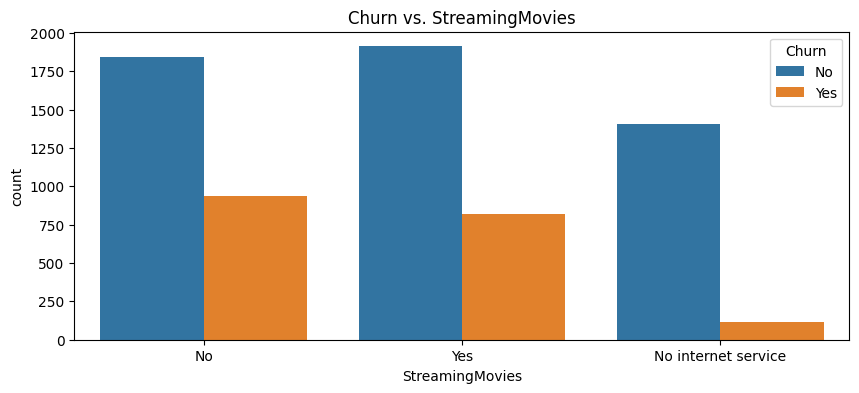

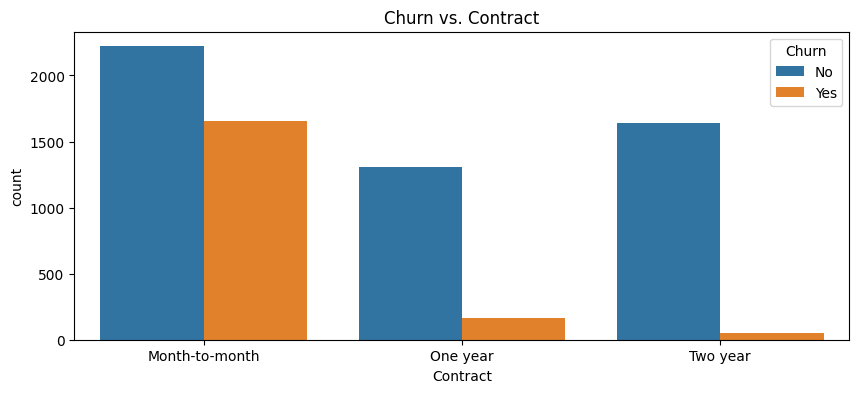

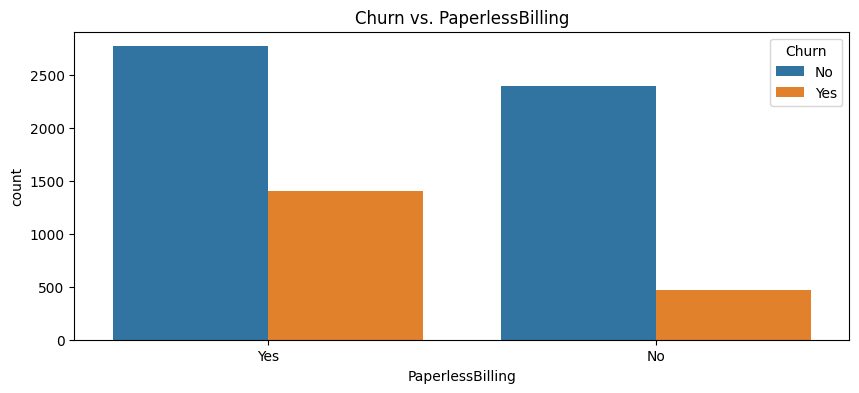

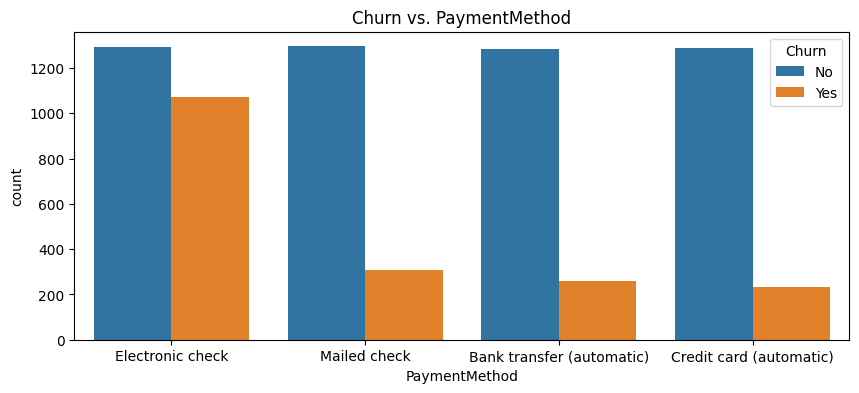

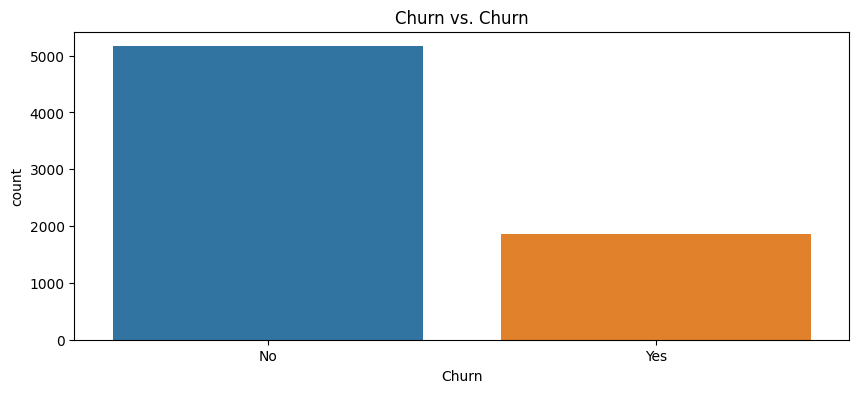

In [12]:
# Churn vs. Numerical Features
for col in numeric_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x='Churn', y=col, data=data_cleaned)
    plt.title(f'Churn vs. {col}')
    plt.show()

# Churn vs. Categorical Features
for col in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, hue='Churn', data=data_cleaned)
    plt.title(f'Churn vs. {col}')
    plt.show()

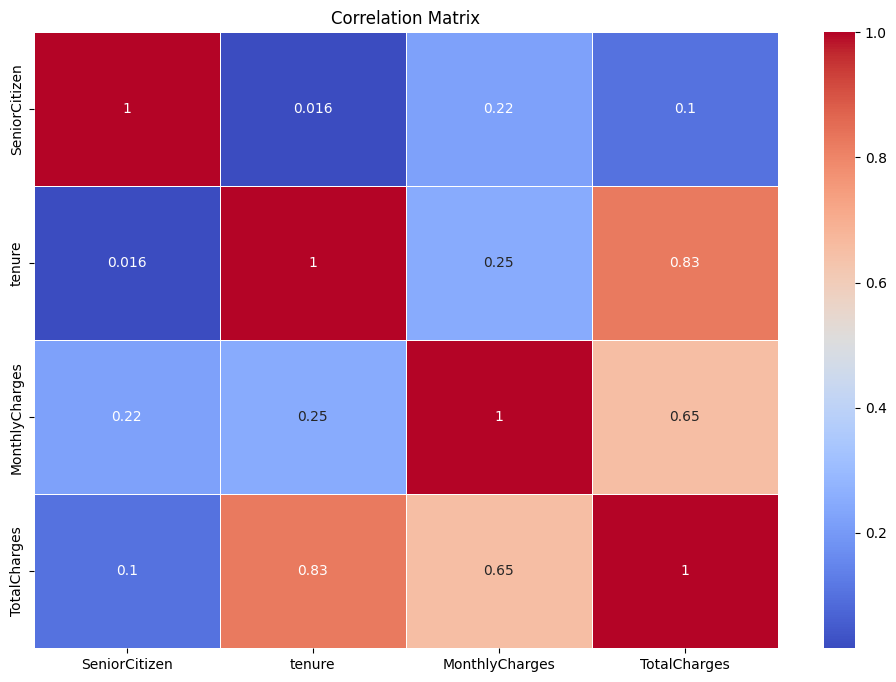

In [13]:
# Correlation matrix
corr_matrix = data_cleaned[numeric_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [15]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Convert categorical variables to numeric using Label Encoding
le = LabelEncoder()
for column in data_cleaned.select_dtypes(include=['object']).columns:
    data_cleaned[column] = le.fit_transform(data_cleaned[column])

# Split the data into features and target
X = data_cleaned.drop('Churn', axis=1)
y = data_cleaned['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<ipython-input-15-a94d07713609>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[column] = le.fit_transform(data_cleaned[column])
<ipython-input-15-a94d07713609>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[column] = le.fit_transform(data_cleaned[column])
<ipython-input-15-a94d07713609>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [18]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.7846481876332623
Confusion Matrix:
 [[932 101]
 [202 172]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.63      0.46      0.53       374

    accuracy                           0.78      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407



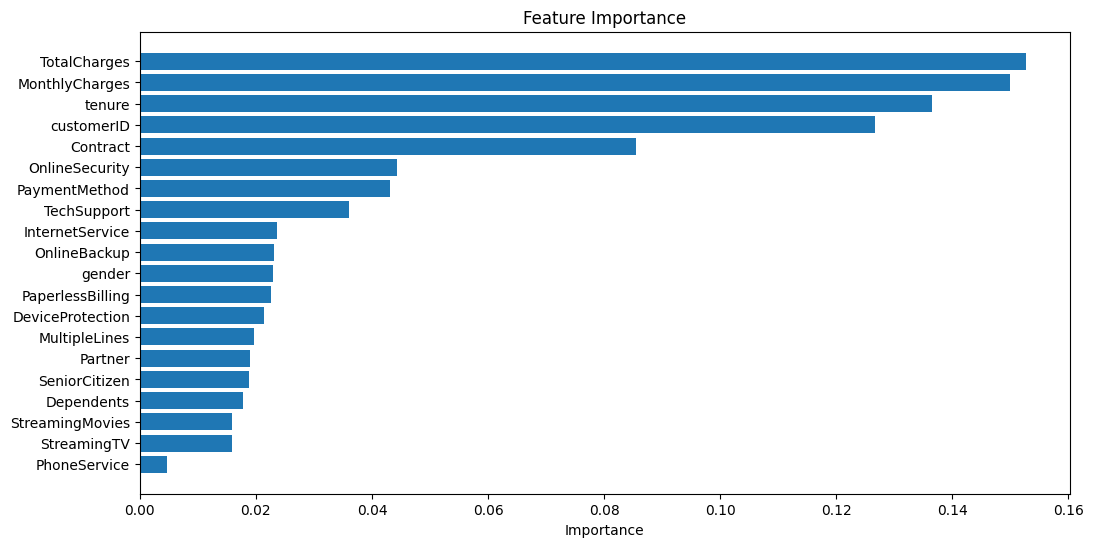

In [19]:
import matplotlib.pyplot as plt

# Get feature importances
importances = model.feature_importances_
features = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()